<a href="https://colab.research.google.com/github/ApoorvThite/G2Mcab/blob/main/G2M_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **G2M CASE STUDY**
Virtual Internship, Data Glacier 2024

**Case Problem**

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

**Goal**

To provide XYZ with actionable insights and recommendations regarding potential investment opportunities in the cab industry.

Provided Data Sets :



In [9]:
import pandas as pd
import numpy as np
import csv


cab_data = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer_id = pd.read_csv('Customer_ID.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')


Preliminary Analysis (Information about each dataset) :

In [10]:
cab_data.info(), cab_data.describe()
customer_id.info(), customer_id.describe()
transaction_id.info(), transaction_id.describe()
city.info(), city.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3),

(None,
                City   Population      Users
 count            20           20         20
 unique           20           20         20
 top     NEW YORK NY   8,405,837    302,149 
 freq              1            1          1)

# Hypothesis 1:
Which cab company is the providing the best Average Profit per km out of the two cab companies?

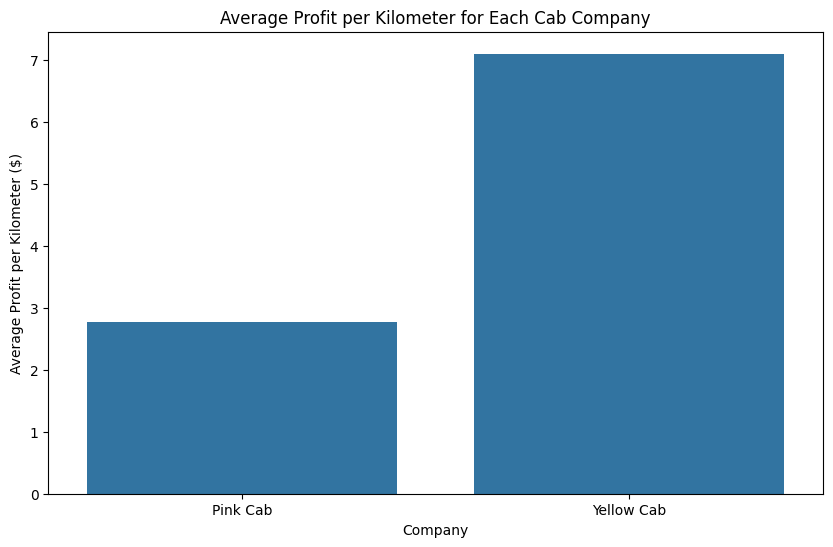

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate profit for each transaction
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

# Calculate profit per kilometer for each transaction
cab_data['Profit_per_KM'] = cab_data['Profit'] / cab_data['KM Travelled']

# Group by company and calculate average profit per kilometer
average_profit_per_km = cab_data.groupby('Company')['Profit_per_KM'].mean().reset_index()

# Rename columns for clarity
average_profit_per_km.columns = ['Company', 'Average_Profit_per_KM']

plt.figure(figsize=(10, 6))
sns.barplot(data=average_profit_per_km, x='Company', y='Average_Profit_per_KM')
plt.title('Average Profit per Kilometer for Each Cab Company')
plt.xlabel('Company')
plt.ylabel('Average Profit per Kilometer ($)')
plt.show()

# Hypothesis 2 -
How do each company cab differ by the city, which city is most profiatble for each cab company ?


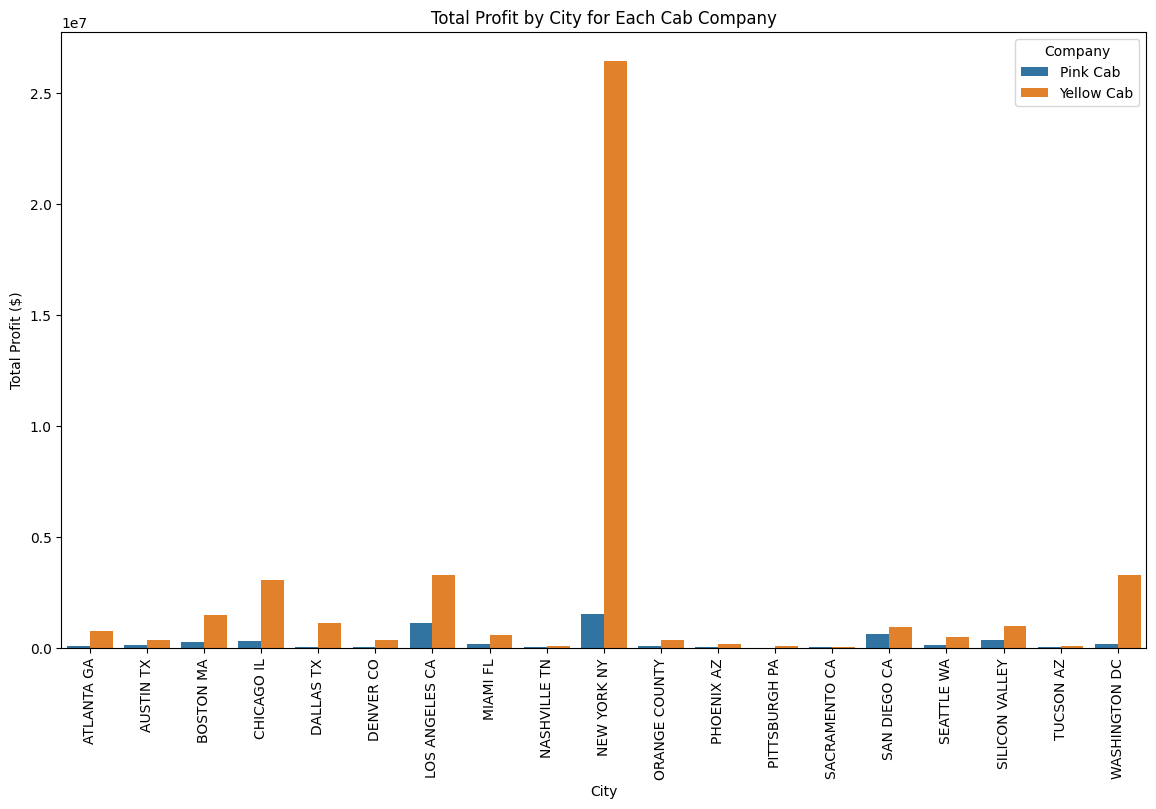

In [36]:
# Merge cab data with city data
cab_city_data = pd.merge(cab_data, city, on='City')

# Calculate profit for each transaction
cab_city_data['Profit'] = cab_city_data['Price Charged'] - cab_city_data['Cost of Trip']

# Group by company and city to calculate total profit
company_city_profit = cab_city_data.groupby(['Company', 'City'])['Profit'].sum().reset_index()

# Find the most profitable city for each company
most_profitable_city = company_city_profit.loc[company_city_profit.groupby('Company')['Profit'].idxmax()]

plt.figure(figsize=(14, 8))
sns.barplot(data=company_city_profit, x='City', y='Profit', hue='Company')
plt.title('Total Profit by City for Each Cab Company')
plt.xlabel('City')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=90)
plt.legend(title='Company')
plt.show()

# Hypothesis 3 -
Citywise Profitable Rides Percentage

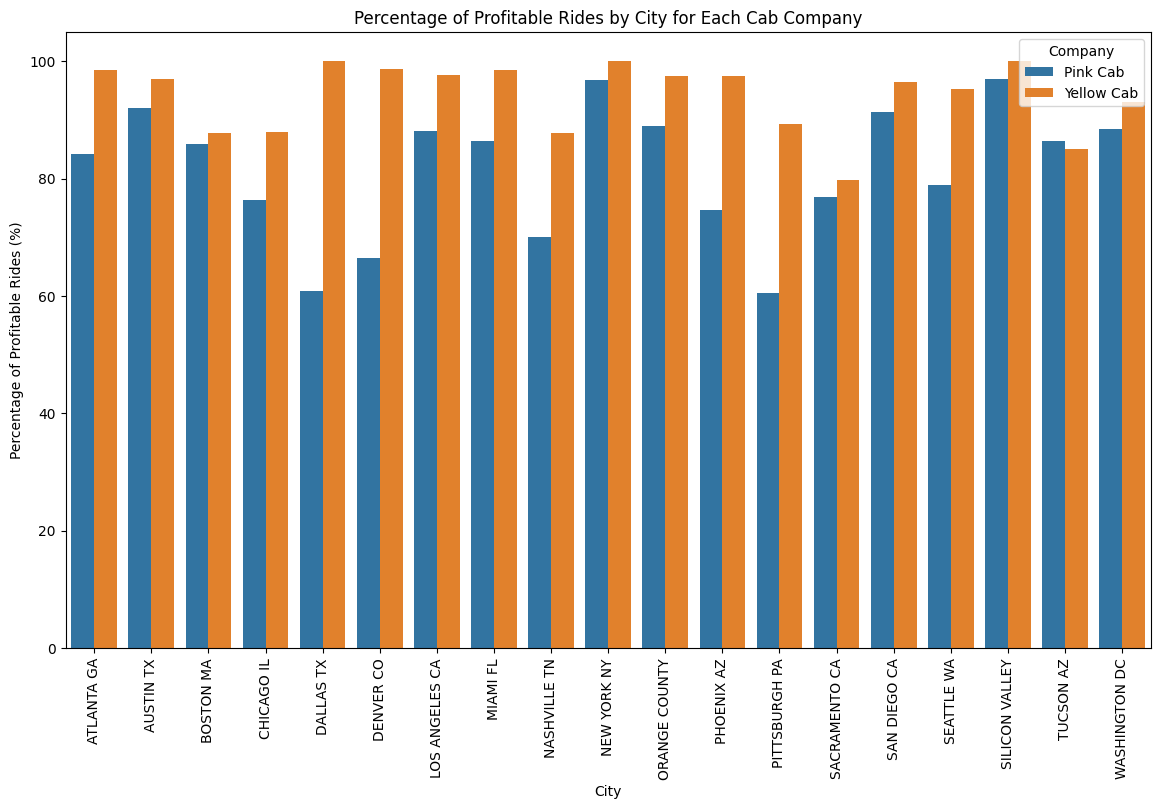

In [44]:
# Determine profitable rides
cab_city_data['Profitable_Ride'] = cab_city_data['Profit'] > 0

# Group by company and city to calculate number of profitable rides and total rides
profitable_rides = cab_city_data.groupby(['Company', 'City'])['Profitable_Ride'].sum().reset_index()
total_rides = cab_city_data.groupby(['Company', 'City']).size().reset_index(name='Total_Rides')

# Merge the profitable rides and total rides dataframes
citywise_profitability = pd.merge(profitable_rides, total_rides, on=['Company', 'City'])

# Calculate the percentage of profitable rides
citywise_profitability['Profitable_Rides_Percentage'] = (citywise_profitability['Profitable_Ride'] / citywise_profitability['Total_Rides']) * 100

# Plotting the percentage of profitable rides for each cab company by city
plt.figure(figsize=(14, 8))
sns.barplot(data=citywise_profitability, x='City', y='Profitable_Rides_Percentage', hue='Company')
plt.title('Percentage of Profitable Rides by City for Each Cab Company')
plt.xlabel('City')
plt.ylabel('Percentage of Profitable Rides (%)')
plt.xticks(rotation=90)
plt.legend(title='Company')
plt.show()

# Hypothesis 4 -
City Wise Cab Users Covered By Company

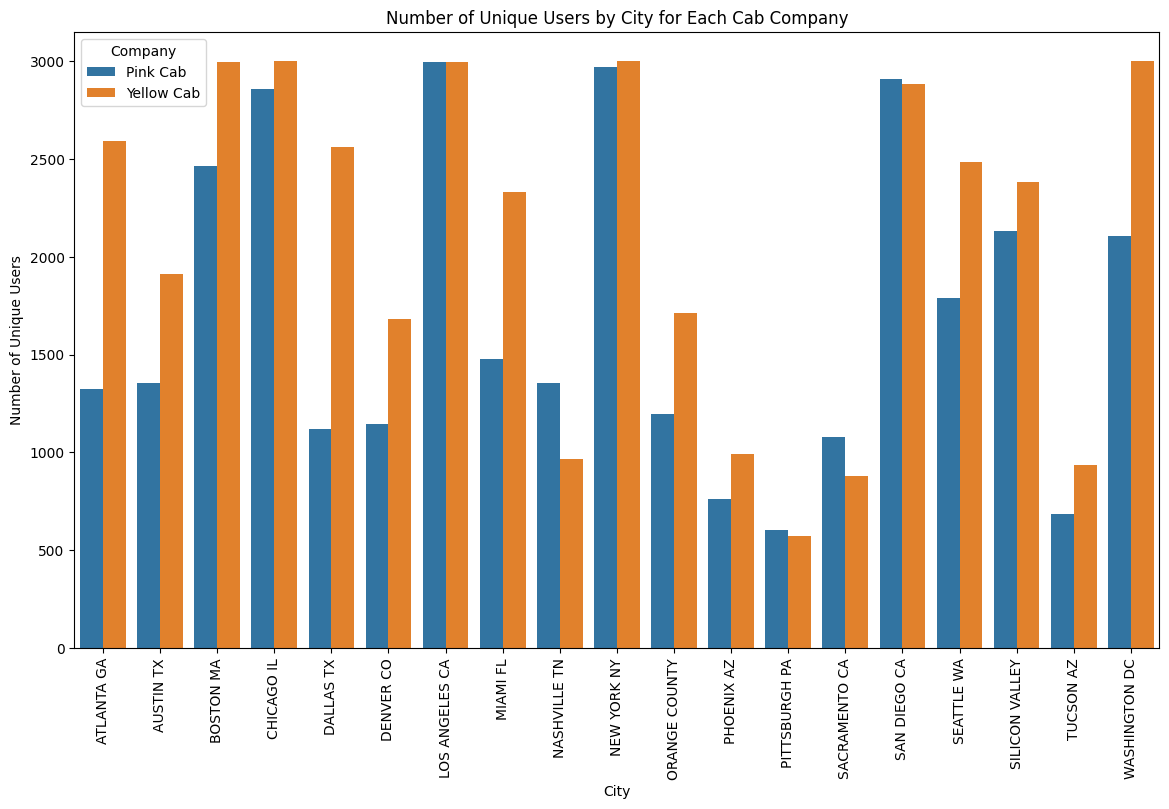

In [59]:
# Merge cab data with transaction data to get customer IDs
cab_transaction_data = pd.merge(cab_data, transaction_id, on='Transaction ID')

# Merge with customer data to get customer details
cab_customer_data = pd.merge(cab_transaction_data, customer_id, on='Customer ID')

# Merge with city data to get city information
cab_city_data = pd.merge(cab_customer_data, city, on='City')


# Group by company and city to calculate the number of unique users
citywise_users = cab_city_data.groupby(['Company', 'City'])['Customer ID'].nunique().reset_index()

# Rename columns for clarity
citywise_users.columns = ['Company', 'City', 'Unique_Users']

# Plotting the number of unique users for each cab company by city
plt.figure(figsize=(14, 8))
sns.barplot(data=citywise_users, x='City', y='Unique_Users', hue='Company')
plt.title('Number of Unique Users by City for Each Cab Company')
plt.xlabel('City')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=90)
plt.legend(title='Company')
plt.show()


# Hypothesis 5 -
Customer analysis based on ride distance

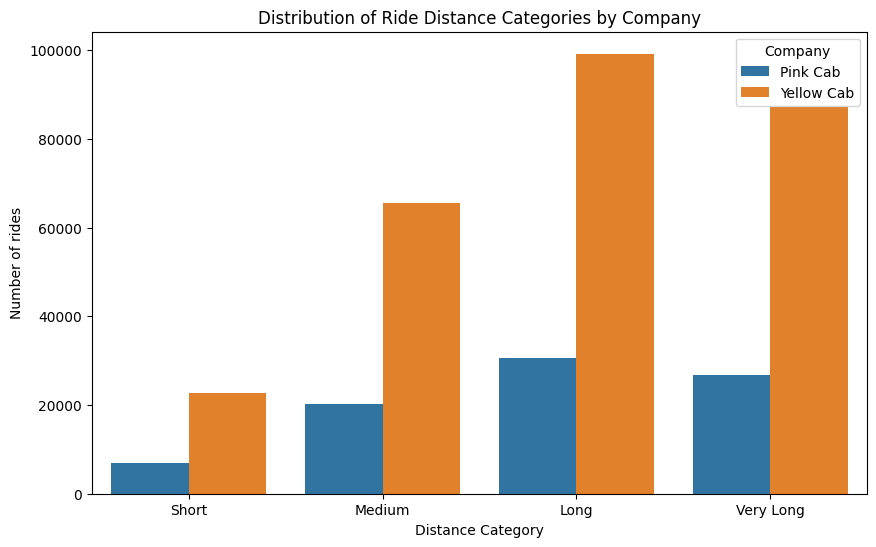

In [70]:
# Define distance bins
bins = [0, 5, 15, 30, 100]  # Example bins: 0-5 km, 5-15 km, 15-30 km, 30+ km
labels = ['Short', 'Medium', 'Long', 'Very Long']

# Classify rides into distance bins
cab_customer_data['Distance_Category'] = pd.cut(cab_customer_data['KM Travelled'], bins=bins, labels=labels)


plt.figure(figsize=(10, 6))
sns.countplot(data=cab_customer_data, x='Distance_Category', hue='Company')
plt.title('Distribution of Ride Distance Categories by Company')
plt.xlabel('Distance Category')
plt.ylabel('Number of rides')
plt.legend(title='Company')
plt.show()